In [1]:
from sklearn.datasets import load_digits

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = load_digits()

In [4]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
features = data.data
target = data.target

features.shape,target.shape

((1797, 64), (1797,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.7, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 64)
(540, 64)
(1257,)
(540,)


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
my_model = LogisticRegression()

In [10]:
my_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
preds = my_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
print(accuracy_score(y_test, preds))

0.9537037037037037


In [14]:
from sklearn.decomposition import PCA

Initially I have 64 dimensions. Now I want to bring it down to 4 dimensions

In [15]:
pca = PCA(n_components=15)

In [16]:
pca.fit(X_train)


PCA(n_components=15)

In [17]:
pc = pca.explained_variance_ratio_

In [18]:
pca.explained_variance_ratio_.shape

(15,)

In [19]:
np.sum(pca.explained_variance_ratio_)

0.8354202103772543

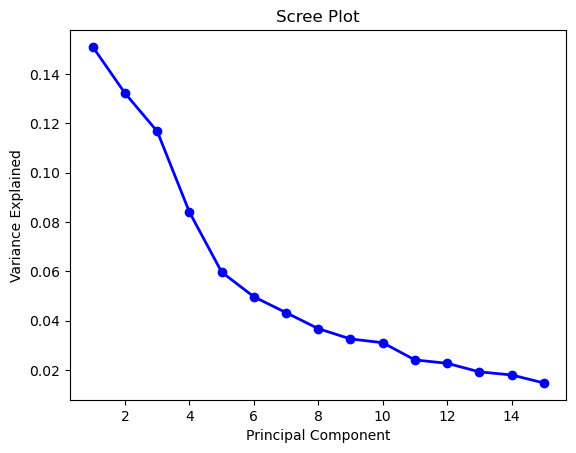

In [20]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pc, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [21]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [22]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,9.726065,-20.028604,-8.971993,15.267968,-12.158092,9.906784,-6.458475,-1.642915,3.716303,-0.303245,-2.398790,-6.024666,4.889328,8.061696,4.395460
1,13.105492,10.510808,4.449354,-3.932217,-2.524440,-2.758948,-4.023797,3.617451,-2.116122,5.766622,-1.273228,0.768326,-10.201044,2.443190,5.911374
2,14.416908,-1.898829,4.294996,-4.639076,6.439363,2.611997,2.285793,0.710052,-7.601331,12.545534,-8.103152,6.555891,1.121644,-7.208840,4.116223
3,8.426678,11.048425,-21.957287,-23.193420,9.344958,-2.766547,0.972949,-7.840312,7.479583,-9.469065,-0.163924,8.058352,4.293685,11.194400,-0.574705
4,-26.159248,6.788478,13.470954,-6.396350,0.657040,0.888399,5.763575,-10.779989,1.919116,-5.429200,-5.527203,-0.246491,4.878835,4.111794,-10.296684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,-17.386324,15.677525,12.476833,4.139974,-8.727127,18.330117,-0.779632,-1.466886,2.543919,4.442333,0.644760,3.494270,-0.995301,1.064997,-0.464378
1253,2.586187,3.880502,18.151459,-12.412509,14.573550,3.672587,11.888366,-0.641937,0.485089,-2.727248,5.537776,-14.095100,-1.767287,3.198643,-2.059148
1254,1.468588,20.106344,-0.402106,9.499244,-7.903424,-11.963460,4.796032,3.801855,2.487012,-3.225869,-5.151416,0.791604,2.849918,-2.287399,1.906922
1255,20.107115,-9.330120,17.585439,2.061942,-14.173787,0.406146,-0.344005,-6.657496,-5.127438,-3.927779,5.139594,4.033682,5.344517,1.905764,-4.544713


In [23]:
X_train_transformed.shape, X_test_transformed.shape

((1257, 15), (540, 15))

In [24]:
my_model.fit(X_train_transformed,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
preds = my_model.predict(X_test_transformed)

In [26]:
print(accuracy_score(y_test, preds))

0.9518518518518518
